In [49]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calculate_log as callog
import torch


%matplotlib inline

In [50]:
class opt:
    outf = 'extracted_features'
    backbone_name = 'resnet18_vanilla_simclr_cifar10'
    dataset ='cifar10'
    fet = '_mean'
    fet2 = '_mean'

In [51]:
ood_dataset=['cifar10','lsun_fix','imagenet_fix','lsun_resize','imagenet_resize'] 
# ood_dataset = ['cifa r10']
out_dataset=ood_dataset
num_out_datasets = len(ood_dataset)

In [ ]:
ind_dataset='svhn'
experiment = opt.backbone_name
ae_type = 'vanilla_AE'
prefix = 'confidence' #confidence

layer_num=9
epoch=1000
ind=[]
ind_train=[]
ood=dict()
for i in range(layer_num):
    ood[i]=[]
    ind.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    ind_train.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    for j in range(len(ood_dataset)):
        ood[i].append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet))))

# ind_MD = np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_in_{}_original_single.npy'.format(ind_dataset)))[:,:-1]
# ood_MD=[]
# for j in range(len(ood_dataset)):
#     ood_MD.append(np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_out_{}_original_single.npy'.format(ood_dataset[j])))[:,:-1])

{'TMP': {'TNR': 0.7837000000000001, 'AUROC': 0.94927148, 'DTACC': 0.8792500000000001, 'AUIN': 0.9414065889946263, 'AUOUT': 0.9555505076995351}}
{'TMP': {'TNR': 0.9393, 'AUROC': 0.98457807, 'DTACC': 0.94565, 'AUIN': 0.980794695802923, 'AUOUT': 0.9872279316526441}}
{'TMP': {'TNR': 0.9489, 'AUROC': 0.9887944, 'DTACC': 0.95115, 'AUIN': 0.9881359962780096, 'AUOUT': 0.9896697411399966}}
{'TMP': {'TNR': 0.9413, 'AUROC': 0.98801185, 'DTACC': 0.9457500000000001, 'AUIN': 0.9884241786163016, 'AUOUT': 0.9879075674705093}}
{'TMP': {'TNR': 0.8481, 'AUROC': 0.97038917, 'DTACC': 0.9099499999999999, 'AUIN': 0.9711193386599496, 'AUOUT': 0.9707614121945941}}
{'TMP': {'TNR': 0.601, 'AUROC': 0.91173497, 'DTACC': 0.8322, 'AUIN': 0.9133435629354905, 'AUOUT': 0.9084245400681115}}
{'TMP': {'TNR': 0.2228, 'AUROC': 0.7550693900000001, 'DTACC': 0.68855, 'AUIN': 0.7620377010971995, 'AUOUT': 0.7336887651454914}}
{'TMP': {'TNR': 0.011600000000000055, 'AUROC': 0.18316102, 'DTACC': 0.5001, 'AUIN': 0.3387670585522469, 

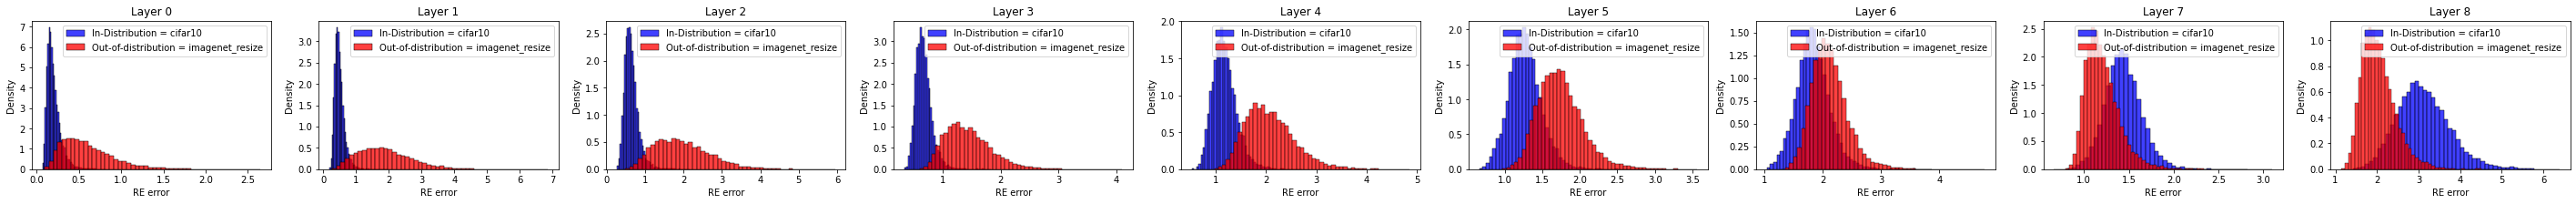

In [42]:
ood_index=4
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind[layer],ood[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=-ind[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=-ood[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('RE error')

In [46]:
ind_sum = ind[1]+ind[2]+ind[3]#+ind[4]
ood_sum = dict()
for i in range(len(ood_dataset)):
    ood_sum[i]=ood[1][i]+ood[2][i]+ood[3][i] # ood[1][i]+ood[2][i]+ood[3][i]+

In [47]:
ind_sum.shape, ood_sum[0].shape

((10000,), (26032,))

In [48]:
ood_index=0
results,_,_ = callog.metric(ind_sum,ood_sum[ood_index])
print(results)
sns.histplot(ax=axs[layer],data=-ind_sum,color='blue',stat='density',bins=50)
sns.histplot(ax=axs[layer],data=-ood_sum[ood_index],color='red',stat='density',bins=50)
axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
axs[layer].set_title('Layer '+str(layer))
axs[layer].set_xlabel('RE error')

{'TMP': {'TNR': 0.5596957590657652, 'AUROC': 0.9091355639213275, 'DTACC': 0.8343909649661955, 'AUIN': 0.8308980869888347, 'AUOUT': 0.954032239900794}}


Text(0.5, 17.200000000000003, 'RE error')

{'TMP': {'TNR': 0.02200000000000002, 'AUROC': 0.46781056, 'DTACC': 0.5027, 'AUIN': 0.48734617962444204, 'AUOUT': 0.4619259057707057}}
{'TMP': {'TNR': 0.0353, 'AUROC': 0.50213371, 'DTACC': 0.5154000000000001, 'AUIN': 0.5260946457250744, 'AUOUT': 0.4865665315967462}}
{'TMP': {'TNR': 0.026599999999999957, 'AUROC': 0.45961418, 'DTACC': 0.5044500000000001, 'AUIN': 0.4866450806695763, 'AUOUT': 0.4599448565884844}}
{'TMP': {'TNR': 0.02100000000000002, 'AUROC': 0.49969410999999997, 'DTACC': 0.5205500000000001, 'AUIN': 0.5280798466288454, 'AUOUT': 0.47629501542671887}}
{'TMP': {'TNR': 0.01959999999999995, 'AUROC': 0.47289069000000006, 'DTACC': 0.5152500000000001, 'AUIN': 0.5122504270381085, 'AUOUT': 0.45836336200727257}}
{'TMP': {'TNR': 0.04469999999999996, 'AUROC': 0.50827513, 'DTACC': 0.51155, 'AUIN': 0.5116043749066462, 'AUOUT': 0.5011399219307613}}
{'TMP': {'TNR': 0.042200000000000015, 'AUROC': 0.49980008000000004, 'DTACC': 0.51065, 'AUIN': 0.5113608268968818, 'AUOUT': 0.4913106752292489}}


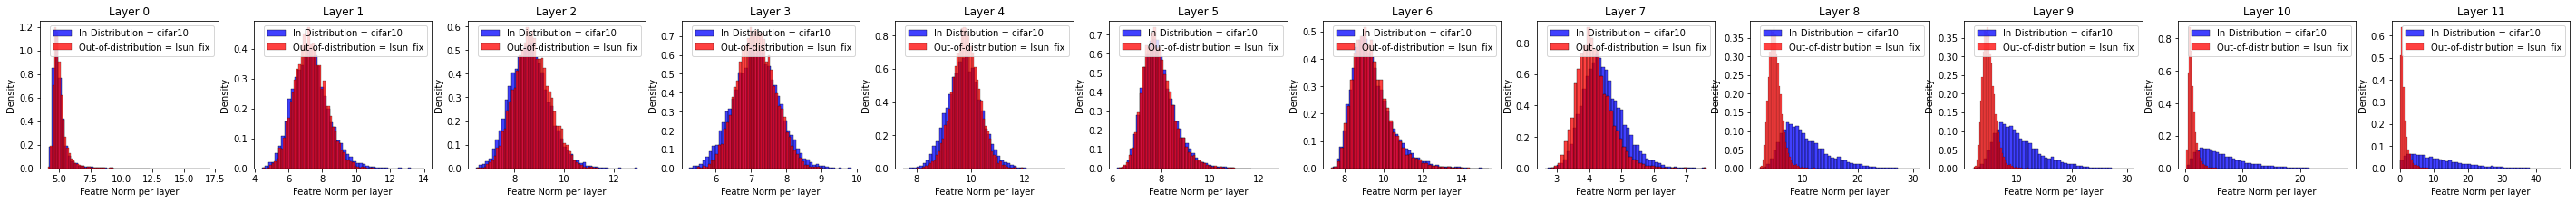

In [110]:
ood_index=1
fig,axs=plt.subplots(1,layer_num+3,figsize=(50,3))
results=dict()
for layer in range(layer_num+3):
    results[layer],_,_ = callog.metric(test_ind_norm[layer],test_ood_norm[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=test_ind_norm[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=test_ood_norm[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Featre Norm per layer')

In [54]:
# ind_train_nn=dict()
# ind_nn=dict()
# ood_nn=dict()
# # fig,axs=plt.subplots(len(ood_dataset),layer_num,figsize=(50,25))
# for layer in range(layer_num):
#     ind_train_dist = torch.cdist(torch.Tensor(train_ind_feature[layer]), torch.Tensor(train_ind_feature[layer]), p=2)
#     ind_train_nn[layer], _ = torch.min(ind_train_dist + torch.eye(ind_train_dist.size(0)) * 1e7, dim=1)
#     ind_dist = torch.cdist(torch.Tensor(test_ind_feature[layer]), torch.Tensor(train_ind_feature[layer]), p=2)
#     ind_nn[layer], _ = torch.min(ind_dist, dim=1)
#     ood_nn[layer]=dict()
#     for ood_index in range(len(ood_dataset)):
#         print(layer, ood_index)
#         ood_dist = torch.cdist(torch.Tensor(test_ood_feature[layer][ood_index]), torch.Tensor(train_ind_feature[layer]), p=2)        
#         ood_nn[layer][ood_index], _ = torch.min(ood_dist, dim=1)
# #         sns.histplot(ax=axs[ood_index][layer],data=ind_train_nn,color='green')
# #         sns.histplot(ax=axs[ood_index][layer],data=ind_nn,color='blue')
# #         sns.histplot(ax=axs[ood_index][layer],data=ood_nn,color='red')
# #         axs[ood_index][layer].legend(['In-train-Distribution = {}'.format(opt.dataset), 'In-Distribution = {}'.format(opt.dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
# #         axs[ood_index][layer].set_title('Layer '+str(layer))
# #         axs[ood_index][layer].set_xlabel('Distance to NN')

{'TMP': {'TNR': 0.05074523663183772, 'AUROC': 0.522910721419791, 'DTACC': 0.5180742778119238, 'AUIN': 0.31132768323986576, 'AUOUT': 0.7317815496048509}}
{'TMP': {'TNR': 0.6226567301782422, 'AUROC': 0.921572303318992, 'DTACC': 0.8492717271051015, 'AUIN': 0.8439039029946146, 'AUOUT': 0.9612021775429059}}
{'TMP': {'TNR': 0.7975184388444991, 'AUROC': 0.9590043907498464, 'DTACC': 0.8976556853103872, 'AUIN': 0.9157959928630112, 'AUOUT': 0.9809189151651231}}
{'TMP': {'TNR': 0.8945144437615242, 'AUROC': 0.9775903042409342, 'DTACC': 0.9274366625691457, 'AUIN': 0.9538997064746002, 'AUOUT': 0.9896221498194436}}
{'TMP': {'TNR': 0.9586278426551936, 'AUROC': 0.9908578441917639, 'DTACC': 0.9548187768899816, 'AUIN': 0.9815523532933518, 'AUOUT': 0.9958909201560853}}
{'TMP': {'TNR': 0.9721496619545175, 'AUROC': 0.9935273355869698, 'DTACC': 0.961771819299324, 'AUIN': 0.9862516416720192, 'AUOUT': 0.9970924251092484}}
{'TMP': {'TNR': 0.9566303011677935, 'AUROC': 0.990066356791641, 'DTACC': 0.95380507068223

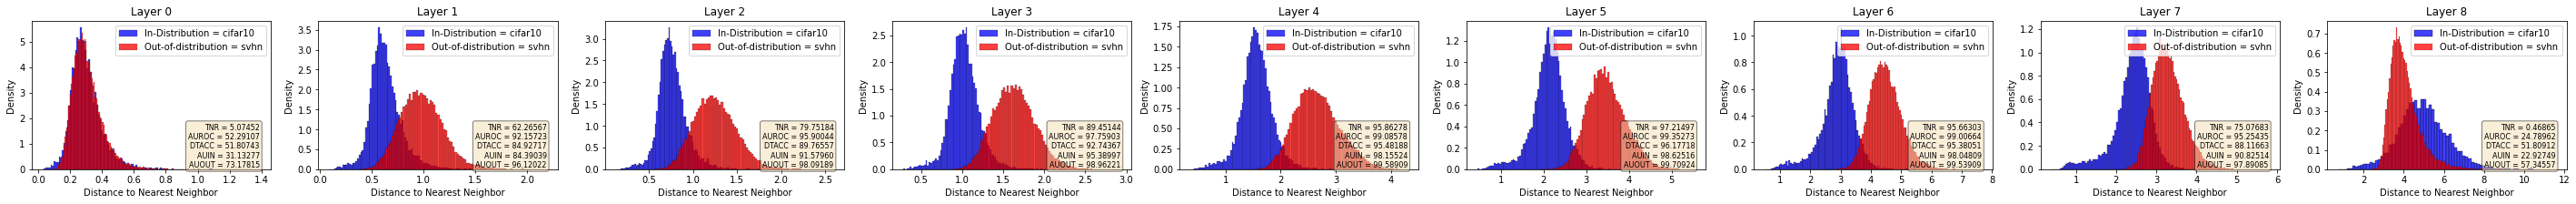

In [55]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(-ind_nn[layer].numpy(),-ood_nn[layer][ood_index].numpy())
    print(results[layer])
    sns.histplot(ax=axs[layer],data=ind_nn[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=ood_nn[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Distance to Nearest Neighbor')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(ind_nn[layer].numpy()),np.max(ood_nn[layer][ood_index].numpy()))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [56]:
from sklearn.preprocessing import StandardScaler
ind_nn_scaled=[]
ood_nn_scaled=dict()
for j in range(len(ood_dataset)):
    ood_nn_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train_nn[i].numpy().reshape(-1,1))
    ind_nn_scaled.append(scaler.transform(ind_nn[i].numpy().reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_nn_scaled[j].append(scaler.transform(ood_nn[i][j].numpy().reshape(-1,1)).reshape(-1))

In [28]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood[i][j].reshape(-1,1)).reshape(-1))

In [29]:
ind_scaled_max=np.min(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.min(ood_scaled[j],0))

In [59]:
ind_nn_scaled_max=np.max(ind_nn_scaled,0)
ood_nn_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_nn_scaled_max.append(np.max(ood_nn_scaled[j],0))

{'TMP': {'TNR': 0.05074523663183772, 'AUROC': 0.522910721419791, 'DTACC': 0.5180742778119238, 'AUIN': 0.31132768323986576, 'AUOUT': 0.7317815496048509}}
{'TMP': {'TNR': 0.6226567301782422, 'AUROC': 0.921572303318992, 'DTACC': 0.8492717271051015, 'AUIN': 0.8439039029946146, 'AUOUT': 0.9612021775429059}}
{'TMP': {'TNR': 0.7975184388444991, 'AUROC': 0.9590043907498464, 'DTACC': 0.8976556853103872, 'AUIN': 0.9157959928630112, 'AUOUT': 0.9809189151651231}}
{'TMP': {'TNR': 0.8945144437615242, 'AUROC': 0.9775903042409342, 'DTACC': 0.9274366625691457, 'AUIN': 0.9538997064746002, 'AUOUT': 0.9896221498194436}}
{'TMP': {'TNR': 0.9586278426551936, 'AUROC': 0.9908578441917639, 'DTACC': 0.9548187768899816, 'AUIN': 0.9815523532933518, 'AUOUT': 0.9958909201560853}}
{'TMP': {'TNR': 0.9721496619545175, 'AUROC': 0.9935273355869698, 'DTACC': 0.961771819299324, 'AUIN': 0.9862516416720192, 'AUOUT': 0.9970924251092484}}
{'TMP': {'TNR': 0.9566303011677935, 'AUROC': 0.990066356791641, 'DTACC': 0.95380507068223

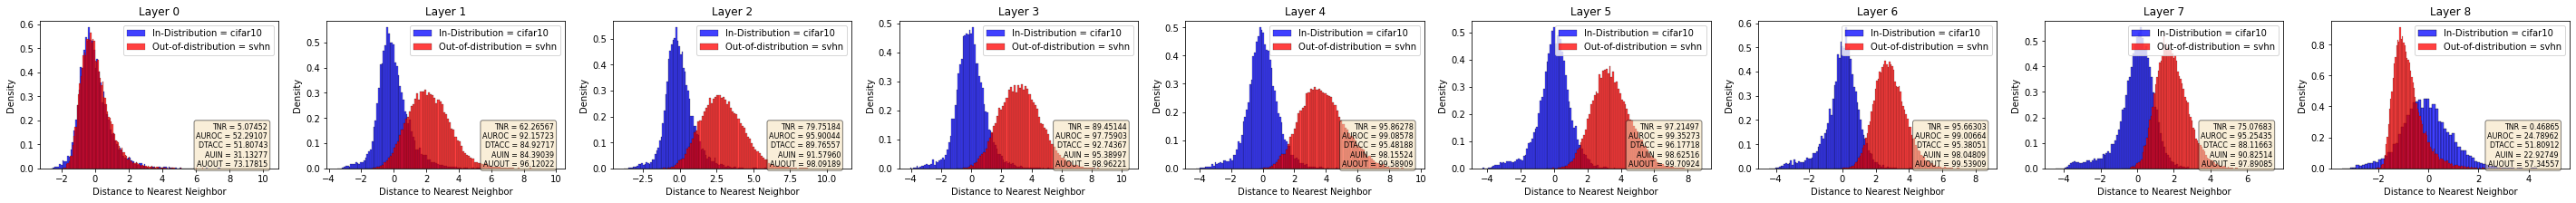

In [60]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(-ind_nn_scaled[layer],-ood_nn_scaled[ood_index][layer])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=ind_nn_scaled[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=ood_nn_scaled[ood_index][layer],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Distance to Nearest Neighbor')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(ind_nn_scaled[layer]),np.max(ood_nn_scaled[ood_index][layer]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

svhn
{'TMP': {'TNR': 0.9009296250768285, 'AUROC': 0.978705504763368, 'DTACC': 0.9346045175169023, 'AUIN': 0.9640740116432935, 'AUOUT': 0.9877307515630774}}


Text(0.5, 0, 'Nearest Neighbor Distance')

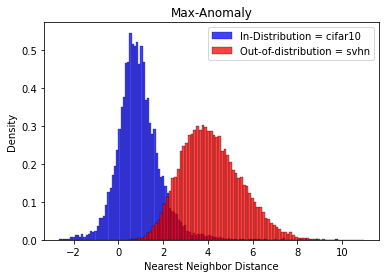

In [109]:
ood_index= 0
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_nn_scaled_max,-ood_nn_scaled_max[ood_index])
print(results_max)
sns.histplot(data=ind_nn_scaled_max,color='blue',stat='density')
sns.histplot(data=ood_nn_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Nearest Neighbor Distance')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

svhn
{'TMP': {'TNR': 0.9848647818070068, 'AUROC': 0.9916303395820528, 'DTACC': 0.9688345421020284, 'AUIN': 0.9877383968162338, 'AUOUT': 0.9944012157060417}}


Text(0.5, 0, 'Reconstruction Error per layer')

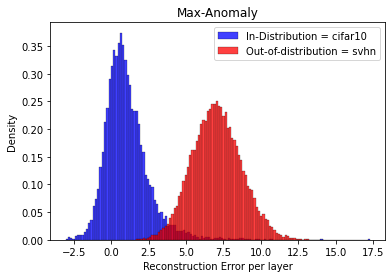

In [62]:
ood_index= 0
cf1 = 1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_nn_scaled_max+cf1*ind_scaled_max,-ood_nn_scaled_max[ood_index]+cf1*ood_scaled_max[ood_index])
print(results_max)
sns.histplot(data=+ind_nn_scaled_max-cf1*ind_scaled_max,color='blue',stat='density')
sns.histplot(data=+ood_nn_scaled_max[ood_index]-cf1*ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

imagenet_fix
{'TMP': {'TNR': 0.47750000000000004, 'AUROC': 0.88404832, 'DTACC': 0.80205, 'AUIN': 0.891336474993946, 'AUOUT': 0.8730649605736792}}


Text(0.5, 0, 'Reconstruction Error per layer')

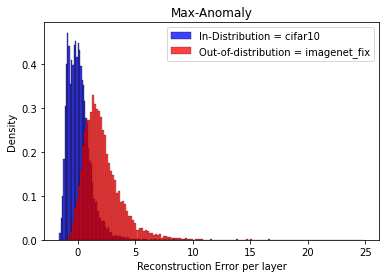

In [35]:
ood_index= 2
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(results_max)
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [106]:
ood_final=[]
cf1 = 1
ind_final=1*(-ind_scaled_max*ind_nn_scaled_max)-(test_ind_norm[layer_num])*cf1
# ind_final=ind_scaled_max/(test_ind_norm[layer_num-1])


for j in range(len(ood_dataset)):
    ood_final.append(
#         -(ood_nn_scaled_max[j])+(test_ood_norm[layer_num-1][j])+ood_scaled_max[j]
        1*(-ood_scaled_max[j]*ood_nn_scaled_max[j])-(test_ood_norm[layer_num][j])*cf1
    )    

In [107]:
ood_index= 0
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)
# sns.histplot(data=ind_final,color='blue',stat='density')
# sns.histplot(data=ood_final[ood_index],color='red',stat='density')
# plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
# plt.title('Max-Anomaly')
# plt.xlabel('Reconstruction Error per layer')
ood_index= 1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)

ood_index= 2
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)

ood_index= 3
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)

ood_index= 4
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)


svhn
{'TMP': {'TNR': 0.9551321450522434, 'AUROC': 0.9858415949600492, 'DTACC': 0.9540441610325753, 'AUIN': 0.9602816551660938, 'AUOUT': 0.9942791336138146}}
lsun_fix
{'TMP': {'TNR': 0.32630000000000003, 'AUROC': 0.91947976, 'DTACC': 0.8782500000000001, 'AUIN': 0.9441869946943254, 'AUOUT': 0.8671888051962019}}
imagenet_fix
{'TMP': {'TNR': 0.43489999999999995, 'AUROC': 0.91429969, 'DTACC': 0.85175, 'AUIN': 0.9324673594585337, 'AUOUT': 0.8900091524255409}}
lsun_resize
{'TMP': {'TNR': 0.9932, 'AUROC': 0.9984783899999999, 'DTACC': 0.9795, 'AUIN': 0.9984512945023435, 'AUOUT': 0.998461717774558}}
imagenet_resize
{'TMP': {'TNR': 0.9798, 'AUROC': 0.99629669, 'DTACC': 0.9675, 'AUIN': 0.9961917066502877, 'AUOUT': 0.9964690574877887}}
